In [3]:
# Define directories
train_dir = './train/train/'
val_dir = './valid/valid/'


In [4]:

# Load annotations from JSON file
import pandas as pd

def load_annotations(json_file):
    with open(json_file, 'r') as file:
        annotations = json.load(file)

    # Convert annotations list to a DataFrame
    df_annotations = pd.DataFrame(annotations)

    # Convert bounding box format from (x_min, y_min, width, height) to (x_min, y_min, x_max, y_max)
    df_annotations['bbox'] = df_annotations.apply(lambda row: [row['bbox'][0], row['bbox'][1],
                                                               row['bbox'][0] + row['bbox'][2],
                                                               row['bbox'][1] + row['bbox'][3]], axis=1)

    return df_annotations

In [5]:
train_dir = './train/train/'
val_dir = './valid/valid/'

In [6]:
import os
trainfile_list = os.listdir(train_dir)
sortedt_file_list = sorted(trainfile_list)
print(sortedt_file_list)

['image_id_000.jpg', 'image_id_001.jpg', 'image_id_002.jpg', 'image_id_003.jpg', 'image_id_004.jpg', 'image_id_005.jpg', 'image_id_006.jpg', 'image_id_007.jpg', 'image_id_008.jpg', 'image_id_009.jpg', 'image_id_010.jpg', 'image_id_011.jpg', 'image_id_012.jpg', 'image_id_013.jpg', 'image_id_014.jpg', 'image_id_015.jpg', 'image_id_016.jpg', 'image_id_017.jpg', 'image_id_018.jpg', 'image_id_019.jpg', 'image_id_020.jpg', 'image_id_021.jpg', 'image_id_022.jpg', 'image_id_023.jpg', 'image_id_024.jpg', 'image_id_025.jpg', 'image_id_026.jpg', 'image_id_027.jpg', 'image_id_028.jpg', 'image_id_029.jpg', 'image_id_030.jpg', 'image_id_031.jpg', 'image_id_032.jpg', 'image_id_033.jpg', 'image_id_034.jpg', 'image_id_035.jpg', 'image_id_036.jpg', 'image_id_037.jpg', 'image_id_038.jpg', 'image_id_039.jpg', 'image_id_040.jpg', 'image_id_041.jpg', 'image_id_042.jpg', 'image_id_043.jpg', 'image_id_044.jpg', 'image_id_045.jpg', 'image_id_046.jpg', 'image_id_047.jpg', 'image_id_048.jpg', 'image_id_049.jpg',

In [7]:
import torchvision.transforms as transforms
import torch
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 调整图像大小为224x224
    transforms.ToTensor(),          # 将图像转换为张量
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),  # 标准化张量
])


In [8]:
import pandas as pd
import json
def load_annotations(json_file):
    with open(json_file, 'r') as file:
        annotations = json.load(file)

    # Convert annotations list to a DataFrame
    df_annotations = pd.DataFrame(annotations)

    # Convert bounding box format from (x_min, y_min, width, height) to (x_min, y_min, x_max, y_max)
    df_annotations['bbox'] = df_annotations.apply(lambda row: [row['bbox'][0], row['bbox'][1],
                                                               row['bbox'][0] + row['bbox'][2],
                                                               row['bbox'][1] + row['bbox'][3]], axis=1)

    return df_annotations
train_annotations = load_annotations('train_annotations')
valid_annotations = load_annotations('valid_annotations')

In [9]:
train_annotations.head()

,id,image_id,category_id,bbox,area,segmentation,iscrowd
0,0,0,1,"[119, 25, 324, 631]",124230,[],0
1,1,1,1,"[131, 82, 458, 522]",143880,[],0
2,2,2,2,"[225, 298, 423, 483]",36630,[],0
3,3,3,2,"[468, 109, 640, 302]",33196,[],0
4,4,4,1,"[14, 242, 625, 396]",94094,[],0


In [10]:
from PIL import Image
import os
def load_data_labels(direction_dir,df_file):
    trainfile_list = os.listdir(direction_dir)
    sortedt_file_list = sorted(trainfile_list)
    data = []
    labels = []
    for _, row in df_file.iterrows():
        x = row['category_id'] -1 
        labels.append(x)
    for filename in sortedt_file_list:
        image_path = os.path.join(direction_dir, filename)
        img = Image.open(image_path)
        img_tensor = transform(img)
        data.append(img_tensor)
    return data,labels
traindata,trainlabel = load_data_labels(train_dir,train_annotations)
valdata,vallabel = load_data_labels(val_dir,valid_annotations)

In [11]:
print(trainlabel)

[0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.applications import MobileNetV2

# Load the pre-trained MobileNetV2 model, excluding the top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Make the base model non-trainable
base_model.trainable = False

# Initialize a Sequential model
model = Sequential()

# Add the base model to the new Sequential model
model.add(base_model)

# Add GlobalAveragePooling2D layer
# model.add(GlobalAveragePooling2D())  # Uncomment this if you want to use GlobalAveragePooling

# Add new layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Add the output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
# earlystop = EarlyStopping(patience=5)
# history = model.fit(train_generator, validation_data=valid_generator, epochs=20, callbacks=[earlystop])
history = model.fit(train_generator, validation_data=valid_generator, epochs=20)

# Evaluate the model on the validation dataset
valid_loss, valid_accuracy = model.evaluate(valid_generator)
print('Validation Loss:', valid_loss)
print('Validation Accuracy:', valid_accuracy)


In [12]:
import torch
import numpy as np


In [62]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score,recall_score, precision_score

# Create the data loaders
train_dataset = TensorDataset(torch.stack(traindata), torch.tensor(trainlabel))
valid_dataset = TensorDataset(torch.stack(valdata), torch.tensor(vallabel))

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

# Define your model using PyTorch's API
class CustomModel(nn.Module):
    def __init__(self):
        super(CustomModel, self).__init__()
        self.base_model = torch.hub.load('pytorch/vision', 'mobilenet_v2', pretrained=True)
        self.base_model.classifier[1] = nn.Identity()  # remove the last classification layer
        self.flatten = nn.Flatten()  # Add Flatten layer
        self.fc1 = nn.Linear(1280, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 2)

    def forward(self, x):
        x = self.base_model(x)
        x = self.flatten(x)  # Flatten the output of the base model
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.dropout(x, p=0.79, training=self.training)
        x = nn.functional.relu(self.fc2(x))
        x = nn.functional.dropout(x, p=0.79, training=self.training)
        x = self.fc3(x)
        return x

# Create an instance of your model
model = CustomModel()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001,weight_decay=0.04)
# Initialize Early Stopping and ReduceLROnPlateau
from torch.optim.lr_scheduler import ReduceLROnPlateau

# PyTorch ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(optimizer, factor=0.1, patience=2, mode='min', verbose=True)
train_losses = []
Validation_L = []
train_L = []
valid_a = []
epoch_loss = 0
# Training loop

for epoch in range(10):
    model.train()
    total_correct = 0
    total_samples = 0
    total_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_samples += labels.size(0)
        total_correct += (predicted == labels).sum().item()
        train_accuracy = total_correct / total_samples
    train_L.append(train_accuracy)
    # Calculate the average training loss for the current epoch
    epoch_loss = epoch_loss/len(train_loader)
    train_losses.append(epoch_loss)  # Append the average training loss to the list

    # Validation loop
    model.eval()
    with torch.no_grad():
        total_correct = 0
        total_samples = 0
        total_loss = 0.0
        for images, labels in valid_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_samples += labels.size(0)
            total_correct += (predicted == labels).sum().item()

        valid_accuracy = total_correct / total_samples
        valid_loss = total_loss / len(valid_loader)
        Validation_L.append(valid_loss)
        valid_a.append(valid_accuracy )
    print(f"Epoch {epoch + 1}/{10}, Validation Loss: {valid_loss:.4f}, Validation Accuracy: {valid_accuracy:.4f}")

# Evaluate the model on the validation dataset
#model.eval()
model.eval()
with torch.no_grad():
    all_predicted = []
    all_labels = []
    total_loss = 0.0
    for images, labels in valid_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        all_predicted.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    valid_accuracy = accuracy_score(all_labels, all_predicted)
    valid_loss = total_loss / len(valid_loader)
    valid_f1_score = f1_score(all_labels, all_predicted, average='weighted')
    valid_recall = recall_score(all_labels, all_predicted, average='weighted')
    valid_precision = precision_score(all_labels, all_predicted, average='weighted')
    print('Final Validation Precision:', valid_precision)
    print('Final Validation Loss:', valid_loss)
    print('Final Validation Accuracy:', valid_accuracy)
    print('Final Validation F1 Score:', valid_f1_score)
    print('Final Validation Recall:', valid_recall)

    # Calculate the confusion matrix
    cm = confusion_matrix(all_labels, all_predicted)
    print('Confusion Matrix:')
    print(cm)
#with torch.no_grad():
    #total_correct = 0
    #total_samples = 0
    #total_loss = 0.0
    #for images, labels in valid_loader:
        #outputs = model(images)
        #loss = criterion(outputs, labels)
        #total_loss += loss.item()
        #_, predicted = torch.max(outputs, 1)
        #total_samples += labels.size(0)
        #total_correct += (predicted == labels).sum().item()

   # valid_accuracy = total_correct / total_samples
    #valid_loss = total_loss / len(valid_loader)



Using cache found in C:\Users\qianl/.cache\torch\hub\pytorch_vision_main
C:\Users\qianl\anaconda3\envs\lab\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\qianl\anaconda3\envs\lab\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10, Validation Loss: 0.6265, Validation Accuracy: 0.8750
Epoch 2/10, Validation Loss: 0.5737, Validation Accuracy: 0.9028
Epoch 3/10, Validation Loss: 0.4933, Validation Accuracy: 0.9722
Epoch 4/10, Validation Loss: 0.4085, Validation Accuracy: 0.9722
Epoch 5/10, Validation Loss: 0.3277, Validation Accuracy: 0.9722
Epoch 6/10, Validation Loss: 0.2561, Validation Accuracy: 0.9722
Epoch 7/10, Validation Loss: 0.1972, Validation Accuracy: 0.9722
Epoch 8/10, Validation Loss: 0.1572, Validation Accuracy: 0.9722
Epoch 9/10, Validation Loss: 0.1322, Validation Accuracy: 0.9722
Epoch 10/10, Validation Loss: 0.1174, Validation Accuracy: 0.9722
Final Validation Precision: 0.9736842105263158
Final Validation Loss: 0.11742408325274785
Final Validation Accuracy: 0.9722222222222222
Final Validation F1 Score: 0.9722007722007722
Final Validation Recall: 0.9722222222222222
Confusion Matrix:
[[34  2]
 [ 0 36]]


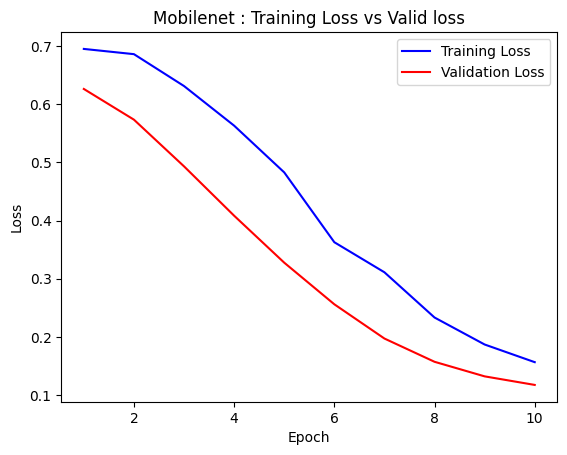

In [68]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(1, 11), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, 11), Validation_L, label='Validation Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Mobilenet : Training Loss vs Valid loss')
plt.legend()
plt.show()

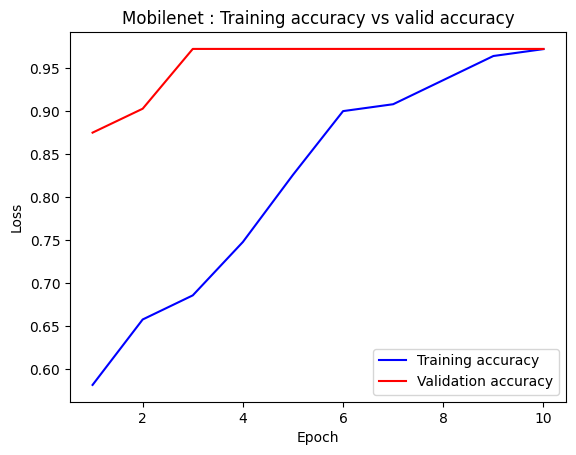

In [69]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(1, 11), train_L, label='Training accuracy', color='blue')
plt.plot(range(1, 11), valid_a, label='Validation accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Mobilenet : Training accuracy vs valid accuracy')
plt.legend()
plt.show()